# Case Study - Iris
Let's proceed with the tutorial on clustering analysis using the "Iris" dataset. We will demonstrate two popular clustering algorithms: K-means and K-medoids. We will compare these two methods based on their performance and clusters they form.

## Setup
Dataset Loading and Exploration

In [3]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.5 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Convert to DataFrame for easier manipulation (optional)
df = pd.DataFrame(data=np.c_[X, y], columns=data.feature_names + ['target'])

# Explore the dataset
print(df.head())
print(df.describe())
print(df.info())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000  

##  Data Preprocessing
Before applying clustering algorithms, we need to preprocess the data to standardize the features.

In [5]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## K-means Clustering

In [6]:
# Initialize the K-means clustering algorithm with a specific number of clusters (k)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the data
kmeans.fit(X_scaled)

# Get the cluster assignments for each sample
kmeans_labels = kmeans.labels_

# Calculate the silhouette score (a measure of how well-defined the clusters are)
kmeans_silhouette_score = silhouette_score(X_scaled, kmeans_labels)

# Calculate the adjusted Rand Index (ARI) score (a measure of how well the clusters match the true labels)
kmeans_ari_score = adjusted_rand_score(y, kmeans_labels)

print(f"K-means Clustering:")
print(f"Silhouette Score: {kmeans_silhouette_score:.4f}")
print(f"Adjusted Rand Index Score: {kmeans_ari_score:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means Clustering:
Silhouette Score: 0.4599
Adjusted Rand Index Score: 0.6201


## K-medoids Clustering

In [7]:
# Initialize the K-medoids clustering algorithm with a specific number of clusters (k)
kmedoids = KMedoids(n_clusters=3, random_state=42)

# Fit the model to the data
kmedoids.fit(X_scaled)

# Get the cluster assignments for each sample
kmedoids_labels = kmedoids.labels_

# Calculate the silhouette score (a measure of how well-defined the clusters are)
kmedoids_silhouette_score = silhouette_score(X_scaled, kmedoids_labels)

# Calculate the adjusted Rand Index (ARI) score (a measure of how well the clusters match the true labels)
kmedoids_ari_score = adjusted_rand_score(y, kmedoids_labels)

print(f"\nK-medoids Clustering:")
print(f"Silhouette Score: {kmedoids_silhouette_score:.4f}")
print(f"Adjusted Rand Index Score: {kmedoids_ari_score:.4f}")



K-medoids Clustering:
Silhouette Score: 0.4590
Adjusted Rand Index Score: 0.6312


## Step 5: Compare K-means and K-medoids

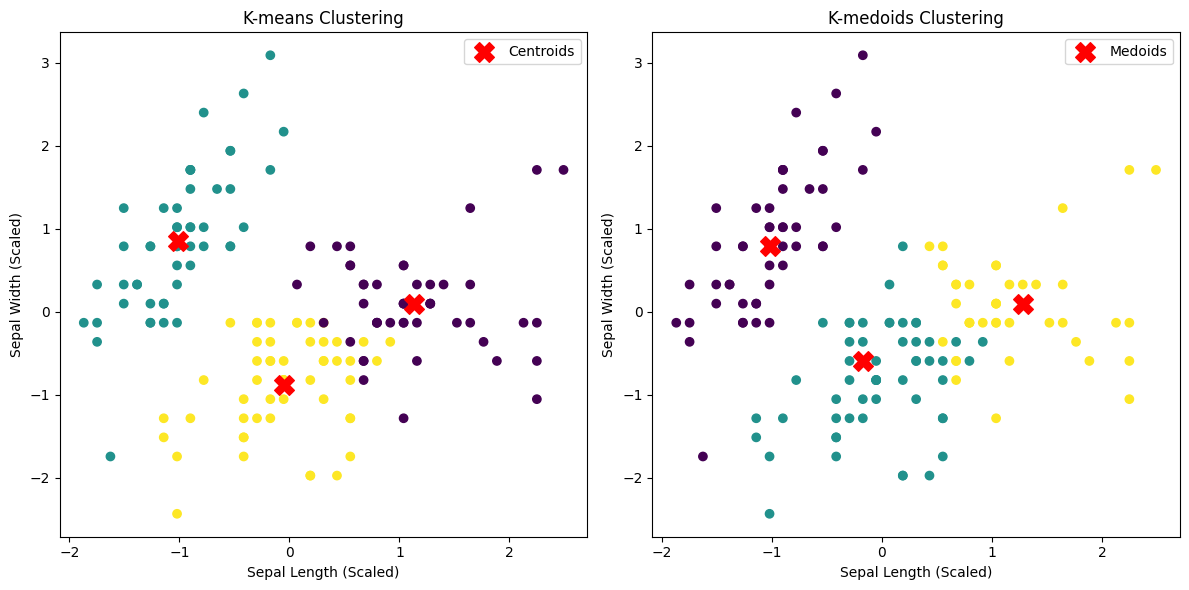

In [8]:
# Visualization of K-means and K-medoids Clusters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Sepal Length (Scaled)')
plt.ylabel('Sepal Width (Scaled)')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmedoids_labels, cmap='viridis')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Medoids')
plt.title('K-medoids Clustering')
plt.xlabel('Sepal Length (Scaled)')
plt.ylabel('Sepal Width (Scaled)')
plt.legend()

plt.tight_layout()
plt.show()